# ANALISIS ESTADISTICO DE DATASET: ECOMMERCE CHURN


## FUENTE: [KAGGLE](https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data)

 AUTOR: Rosa Torres

In [3]:
!pip install kagglehub
!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 3.7 MB/s eta 0:00:00


# PASO 1 - IMPORTAR LIBRERIAS

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import sklearn.compose
import sklearn.preprocessing
import janitor

# PASO 2 - EJECUTAMOS MISSING EXTENSION NOTEBOOK

In [6]:
%run '/content/pandas_missing_extension.ipynb'

# PASO 3 - CARGAMOS DATASET

In [10]:
# Download latest version
path = kagglehub.dataset_download("upam22/ecommerce-customer-churn-data")
file = '/ecom_data.csv'

path_file = path + file

print("Path to dataset files:", path_file)

data_df = pd.read_csv(path_file)
data_df.head(5)

100%|██████████| 90.7k/90.7k [00:00<00:00, 38.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/upam22/ecommerce-customer-churn-data/versions/1/ecom_data.csv


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# PASO 4 - EDA

In [12]:
data_df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


In [14]:
data_df.dtypes.value_counts()

,count
int64,8
float64,7
object,5


In [15]:
data_df.shape

(5630, 20)

se elimina el ID

In [16]:
data_df.drop('CustomerID',axis=1,inplace=True)

# PASO 5 - TRATAMIENTO DE DATOS FALTANTES

contar los datos faltantes en total

In [26]:
data_df.missing.number_missing()

1856

cual es el resumen de los valores missing

In [27]:
data_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,Churn,0,5630,0.000000
1,Tenure,264,5630,4.689165
2,PreferredLoginDevice,0,5630,0.000000
3,CityTier,0,5630,0.000000
4,WarehouseToHome,251,5630,4.458259
5,PreferredPaymentMode,0,5630,0.000000
6,Gender,0,5630,0.000000
7,HourSpendOnApp,255,5630,4.529307
8,NumberOfDeviceRegistered,0,5630,0.000000
9,PreferedOrderCat,0,5630,0.000000


In [31]:
data_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,12,63.157895
1,251,1,5.263158
2,255,1,5.263158
3,256,1,5.263158
4,258,1,5.263158
5,264,1,5.263158
6,265,1,5.263158
7,307,1,5.263158


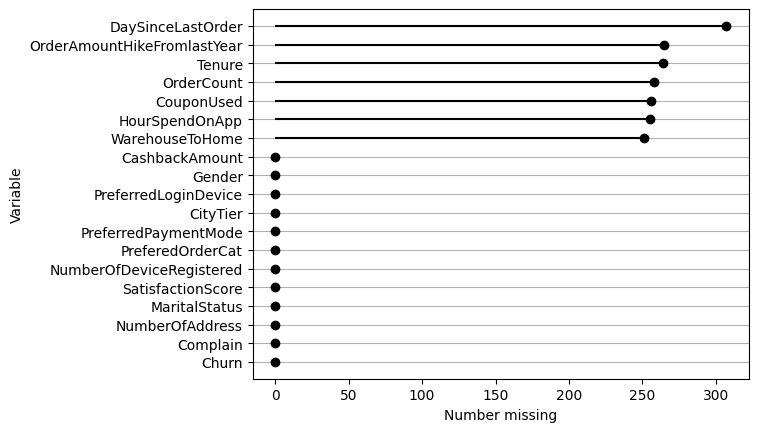

In [32]:
data_df.missing.missing_variable_plot()

\# ANALIZANDO POR OBSERVACIONES O CASOS(FILAS)

In [33]:
filas_missing = data_df.missing.missing_case_summary()
filas_missing

,case,n_missing,pct_missing
0,0,0,0.000000
1,1,1,4.761905
2,2,1,4.761905
3,3,0,0.000000
4,4,1,4.761905
...,...,...,...
5625,5625,0,0.000000
5626,5626,1,4.761905
5627,5627,0,0.000000
5628,5628,0,0.000000


In [34]:
filas_missing[filas_missing['pct_missing'] > 0]

,case,n_missing,pct_missing
1,1,1,4.761905
2,2,1,4.761905
4,4,1,4.761905
6,6,1,4.761905
7,7,1,4.761905
...,...,...,...
5610,5610,1,4.761905
5621,5621,1,4.761905
5622,5622,1,4.761905
5623,5623,1,4.761905


In [36]:
data_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,3774,67.033748
1,1,1856,32.966252


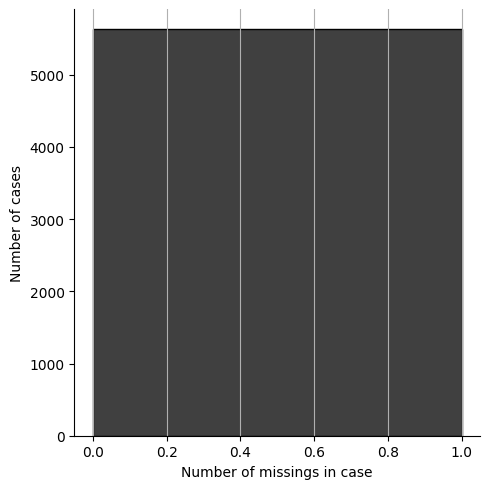

In [37]:
data_df.missing.missing_case_plot()

<Axes: >

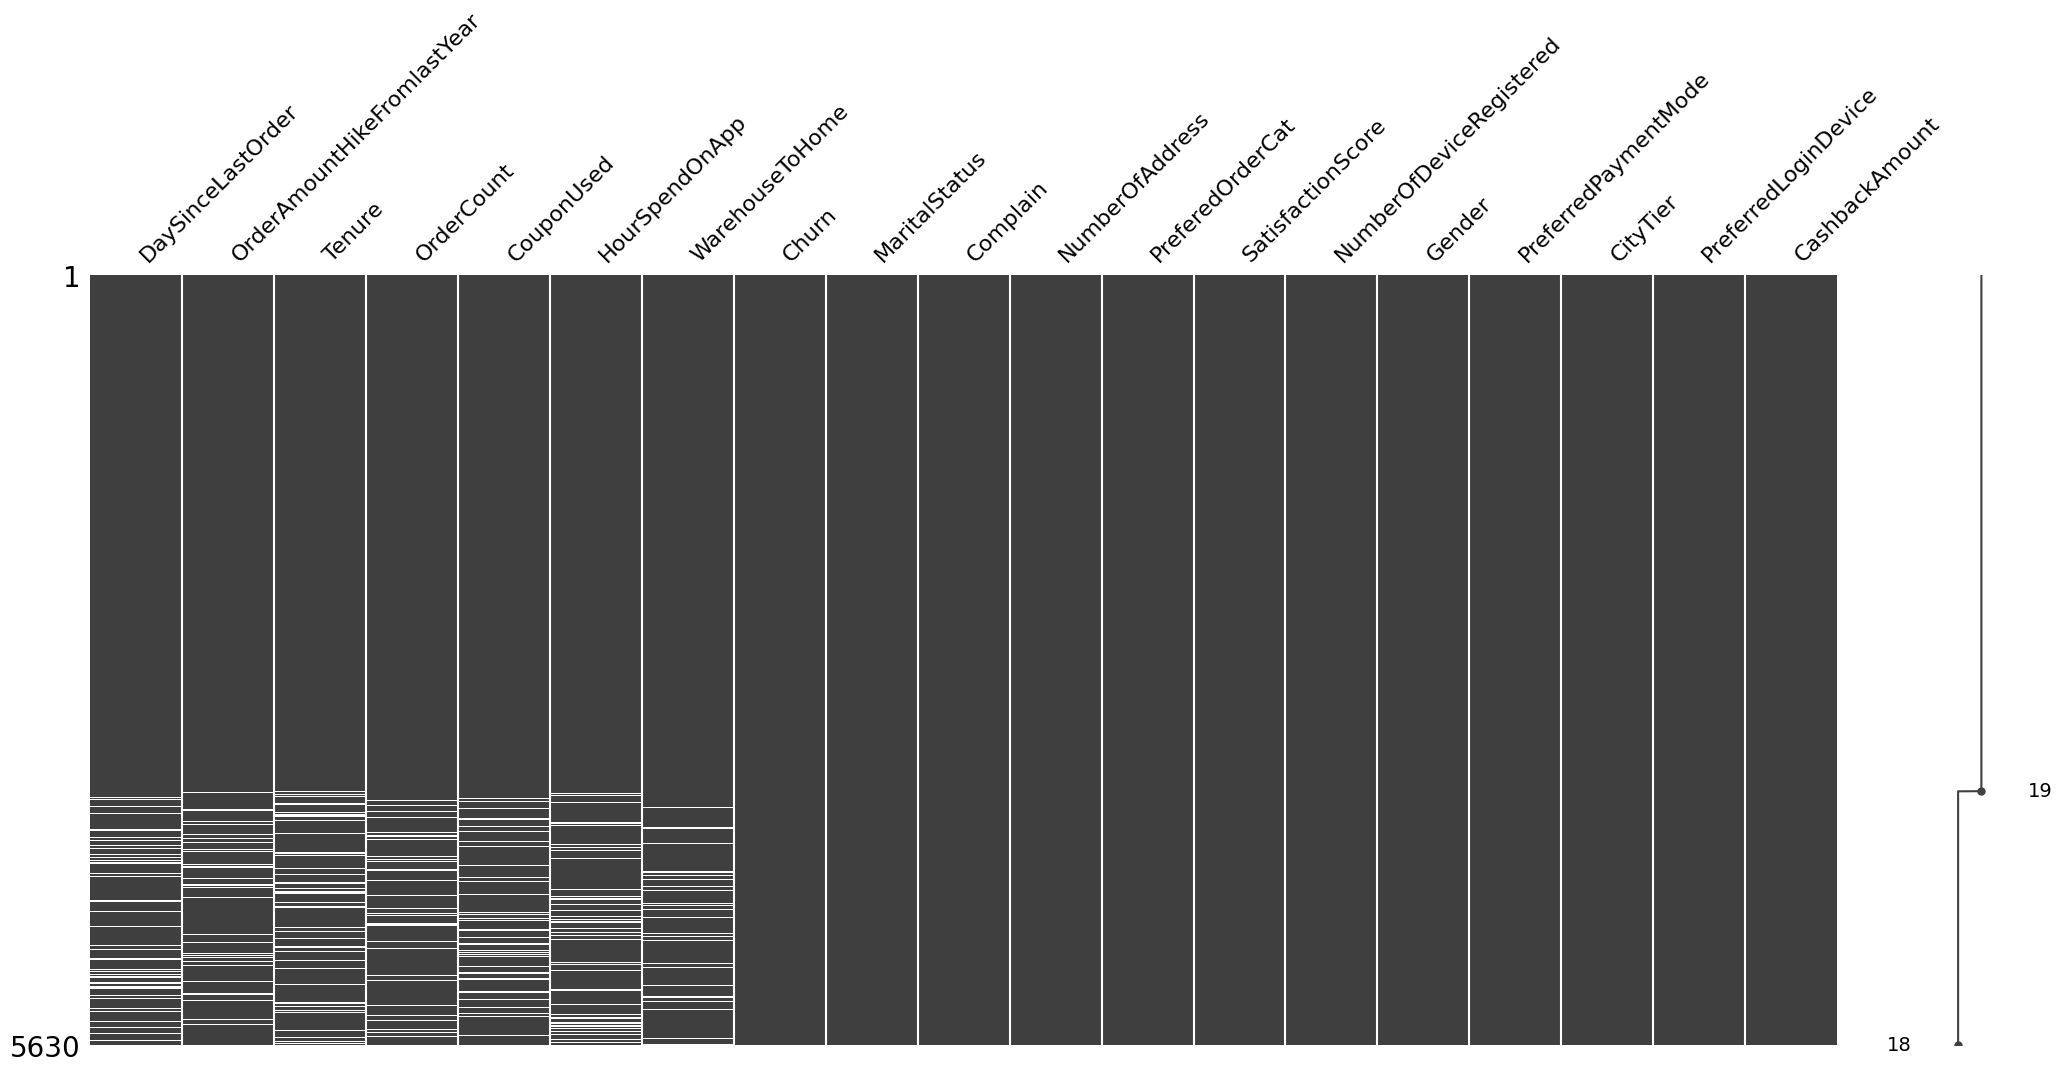

In [24]:
(
    data_df.missing.sort_variables_by_missingness()
    .pipe(
        missingno.matrix,sort='descending'
    )
)

In [38]:
data_df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# ESTANARIZAMOS LA NOMENCLATURA DE COLUMNAS

In [40]:
data_df =(
    data_df.clean_names(
        case_type="snake"
    )
)
data_df.head(2)

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


In [41]:
data_df.columns

Index(['churn', 'tenure', 'preferred_login_device', 'city_tier',
       'warehouse_to_home', 'preferred_payment_mode', 'gender',
       'hour_spend_on_app', 'number_of_device_registered',
       'prefered_order_cat', 'satisfaction_score', 'marital_status',
       'number_of_address', 'complain', 'order_amount_hike_fromlast_year',
       'coupon_used', 'order_count', 'day_since_last_order',
       'cashback_amount'],
      dtype='object')

# Imputacion de day_since_last_order

In [42]:
missing_variable = 'day_since_last_order'

# IMPUTACION POR MEDIA

In [43]:
data_df_clean_mean = data_df.copy()
data_df_clean_mean['day_since_last_order'] = data_df_clean_mean['day_since_last_order'].fillna(data_df_clean_mean['day_since_last_order'].mean())
print(f" media original : {data_df['day_since_last_order'].mean()} | media sin nulos : {data_df_clean_mean['day_since_last_order'].mean()}")


 media original : 4.543490512868683 | media sin nulos : 4.543490512868684


# IMPUTACION POR MEDIANA

In [44]:
data_df_clean_median = data_df.copy()
data_df_clean_median['day_since_last_order'] = data_df_clean_median['day_since_last_order'].fillna(data_df_clean_median['day_since_last_order'].median())
print(f" media original : {data_df['day_since_last_order'].median()} | media sin nulos : {data_df_clean_median['day_since_last_order'].median()}")

 media original : 3.0 | media sin nulos : 3.0


# IMPUTACION POR MODA

In [45]:
data_df_clean_mode = data_df.copy()
data_df_clean_mode['day_since_last_order'] = data_df_clean_mode['day_since_last_order'].fillna(data_df_clean_mode['day_since_last_order'].mode())
print(f" media original : {data_df['day_since_last_order'].mode()} | media sin nulos : {data_df_clean_mode['day_since_last_order'].mode()}")

 media original : 0    3.0
Name: day_since_last_order, dtype: float64 | media sin nulos : 0    3.0
Name: day_since_last_order, dtype: float64


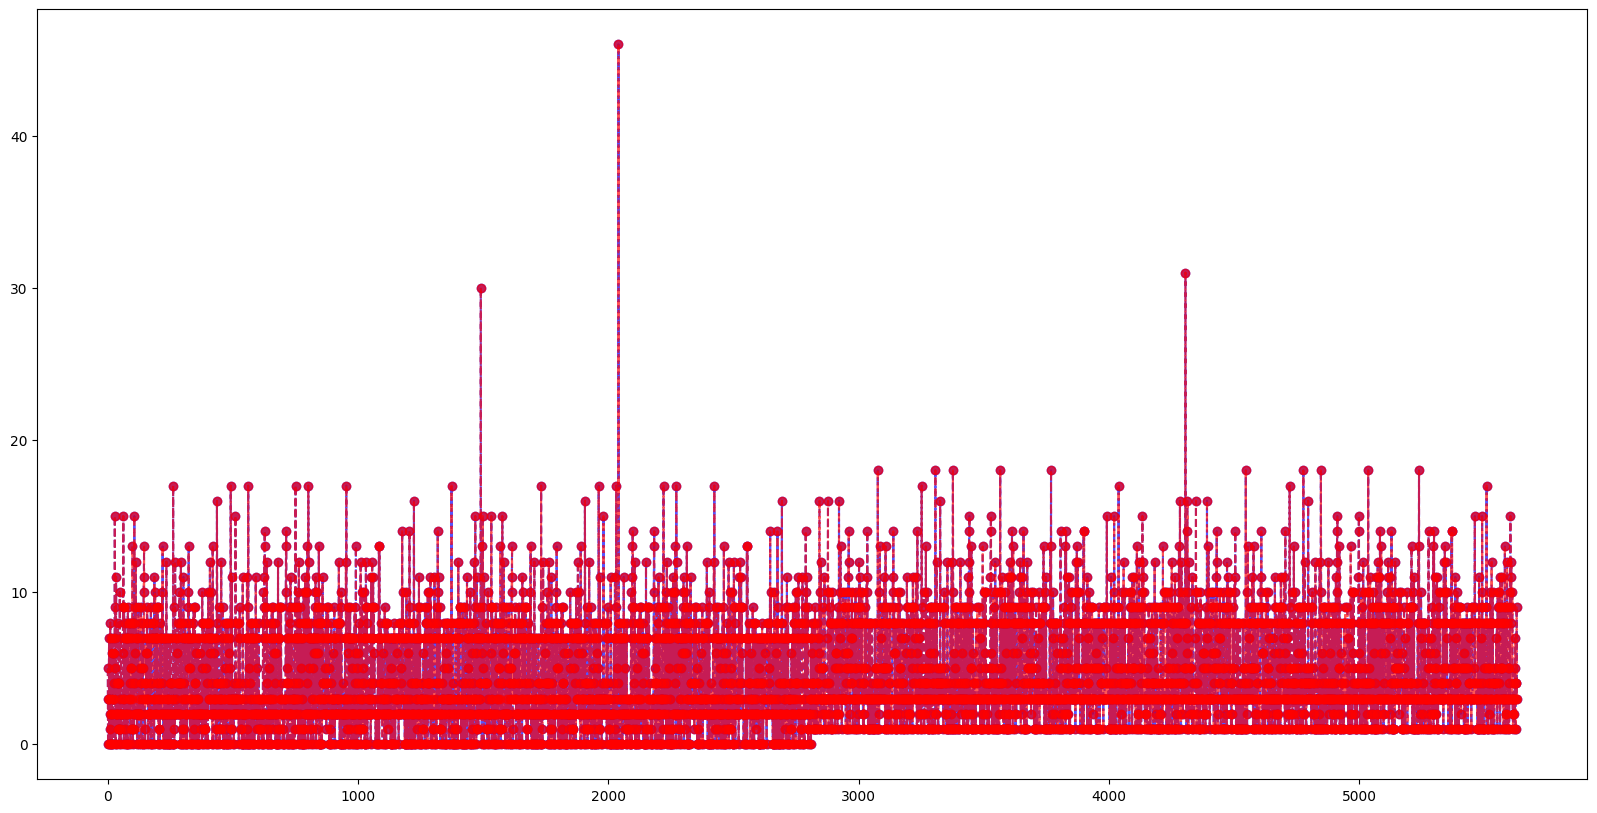

In [46]:
plt.figure(figsize=(20,10))
data_df['day_since_last_order'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
data_df_clean_median['day_since_last_order'].plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

In [47]:
data_df_clean = data_df_clean_median

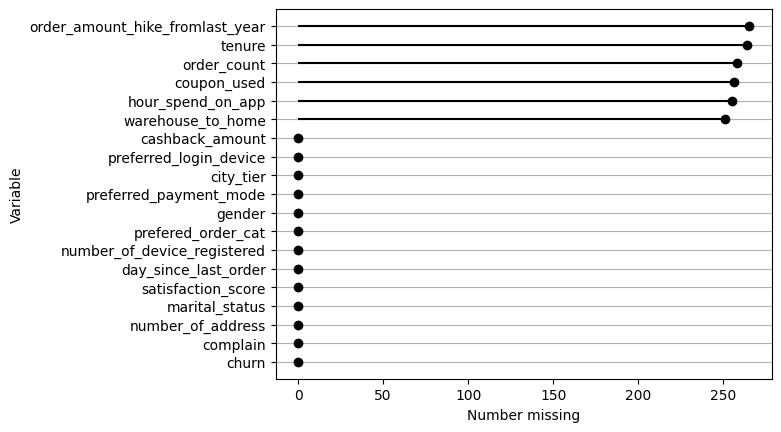

In [48]:
data_df_clean.missing.missing_variable_plot()

# IMPUTACIÓN DE order_amount_hike_fromlast_year

<Axes: >

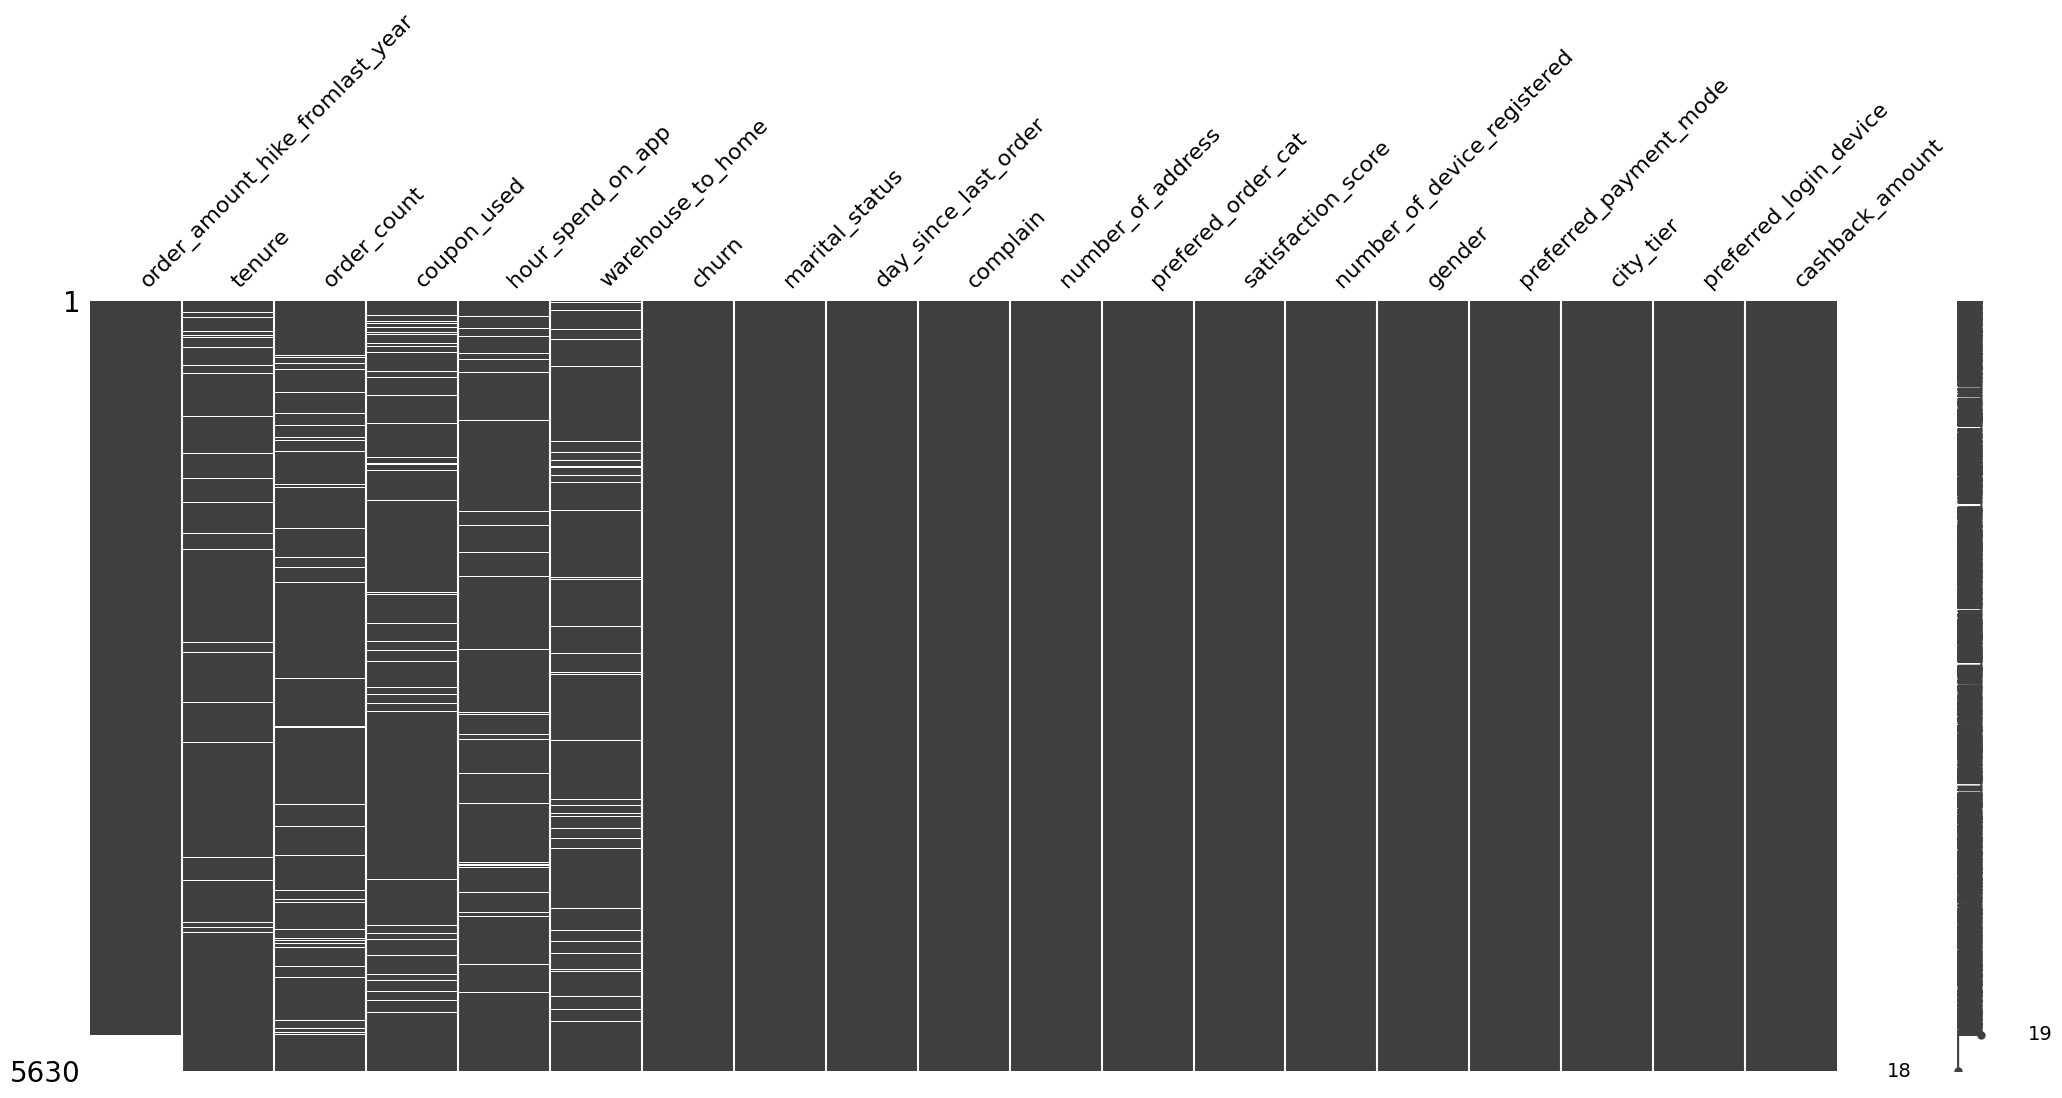

In [49]:
(
    data_df_clean
    .missing.sort_variables_by_missingness()
    .sort_values(by='order_amount_hike_fromlast_year')
    .pipe(missingno.matrix)
)

In [50]:
missing_variable = 'order_amount_hike_fromlast_year'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode())
print(f" moda original : {data_df_clean[missing_variable].mode()} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()}")


 media original : 15.707921714818266 | media sin nulos : 15.707921714818266
 mediana original : 15.0 | mediana sin nulos : 15.0
 moda original : 0    14.0
Name: order_amount_hike_fromlast_year, dtype: float64 | moda sin nulos : 0    14.0
Name: order_amount_hike_fromlast_year, dtype: float64


In [51]:
data_df_clean = data_df_clean_median

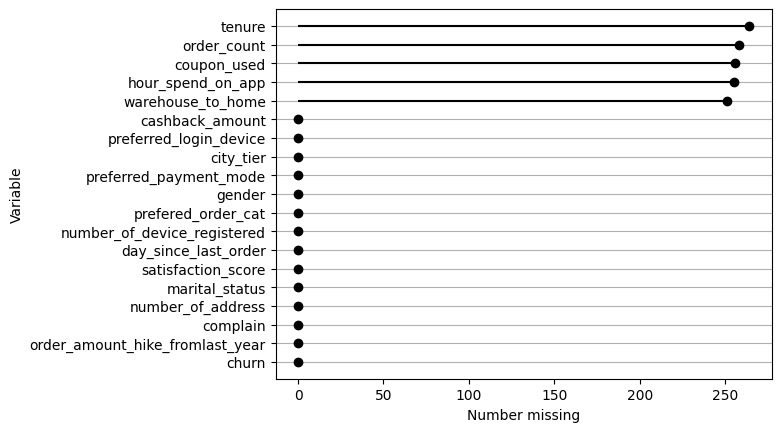

In [52]:
data_df_clean.missing.missing_variable_plot()


# IMPUTACIÓN DE tenure

In [53]:
missing_variable = 'tenure'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode())
print(f" moda original : {data_df_clean[missing_variable].mode()} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()}")


 media original : 10.189899366380917 | media sin nulos : 10.189899366380917
 mediana original : 9.0 | mediana sin nulos : 9.0
 moda original : 0    1.0
Name: tenure, dtype: float64 | moda sin nulos : 0    1.0
Name: tenure, dtype: float64


In [54]:
data_df_clean = data_df_clean_median

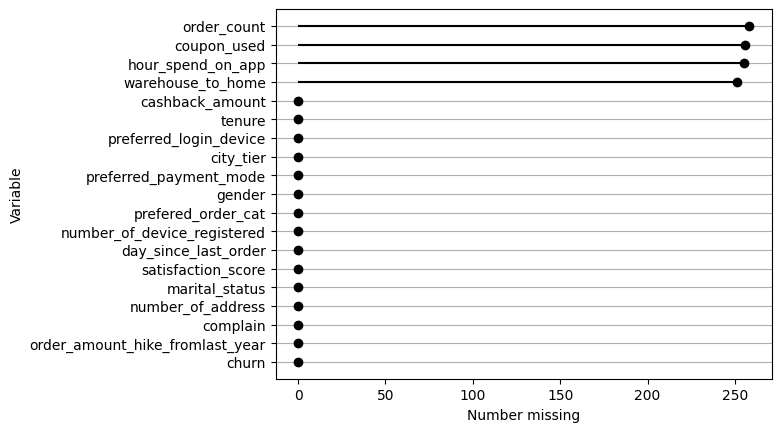

In [55]:
data_df_clean.missing.missing_variable_plot()

# IMPUTACIÓN DE order_count

In [56]:
missing_variable = 'order_count'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode())
print(f" moda original : {data_df_clean[missing_variable].mode()} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()}")


 media original : 3.0080044676098288 | media sin nulos : 3.0080044676098288
 mediana original : 2.0 | mediana sin nulos : 2.0
 moda original : 0    2.0
Name: order_count, dtype: float64 | moda sin nulos : 0    2.0
Name: order_count, dtype: float64


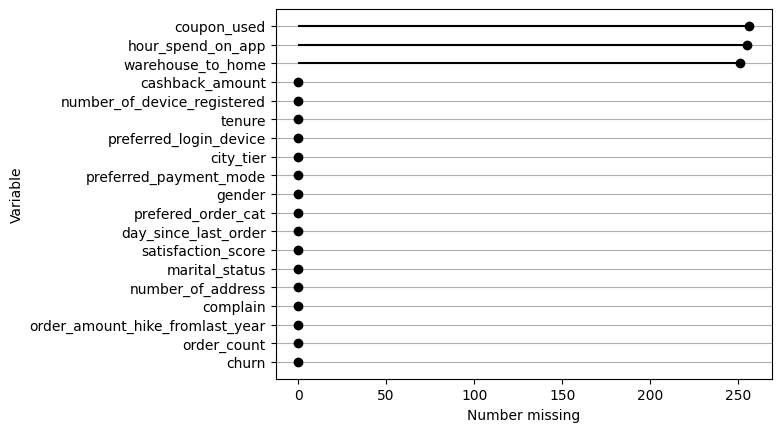

In [57]:
data_df_clean = data_df_clean_median
data_df_clean.missing.missing_variable_plot()

# IMPUTACIÓN DE coupon_used

In [58]:
missing_variable = 'coupon_used'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode()[0])
print(f" moda original : {data_df_clean[missing_variable].mode()[0]} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()[0]}")


 media original : 1.7510234462225531 | media sin nulos : 1.7510234462225531
 mediana original : 1.0 | mediana sin nulos : 1.0
 moda original : 1.0 | moda sin nulos : 1.0


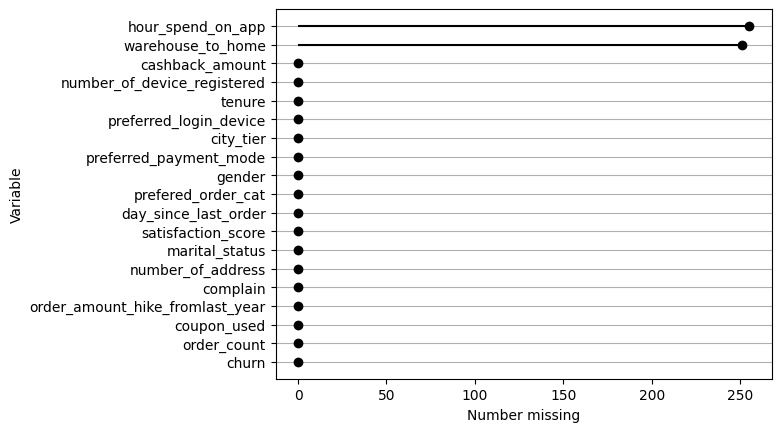

In [59]:

data_df_clean = data_df_clean_mode
data_df_clean.missing.missing_variable_plot()

# IMPUTACIÓN DE hour_spend_on_app

In [60]:
missing_variable = 'hour_spend_on_app'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode()[0])
print(f" moda original : {data_df_clean[missing_variable].mode()[0]} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()[0]}")


 media original : 2.9315348837209303 | media sin nulos : 2.9315348837209303
 mediana original : 3.0 | mediana sin nulos : 3.0
 moda original : 3.0 | moda sin nulos : 3.0


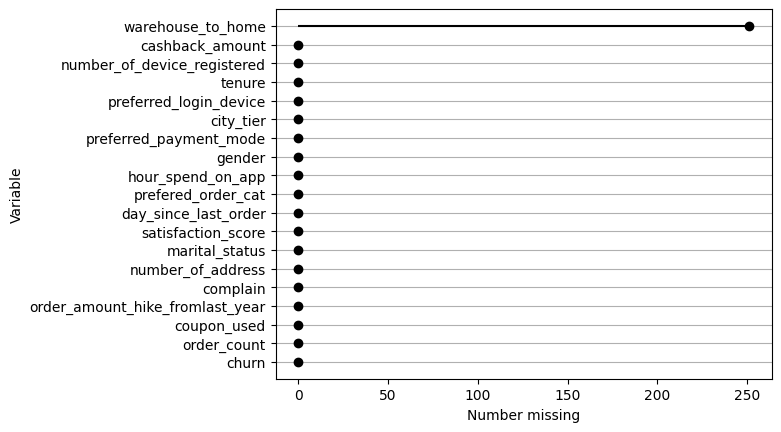

In [61]:
data_df_clean = data_df_clean_median
data_df_clean.missing.missing_variable_plot()

# IMPUTACIÓN DE warehouse_to_home

In [62]:
missing_variable = 'warehouse_to_home'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode()[0])
print(f" moda original : {data_df_clean[missing_variable].mode()[0]} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()[0]}")


 media original : 15.639895891429633 | media sin nulos : 15.639895891429632
 mediana original : 14.0 | mediana sin nulos : 14.0
 moda original : 9.0 | moda sin nulos : 9.0


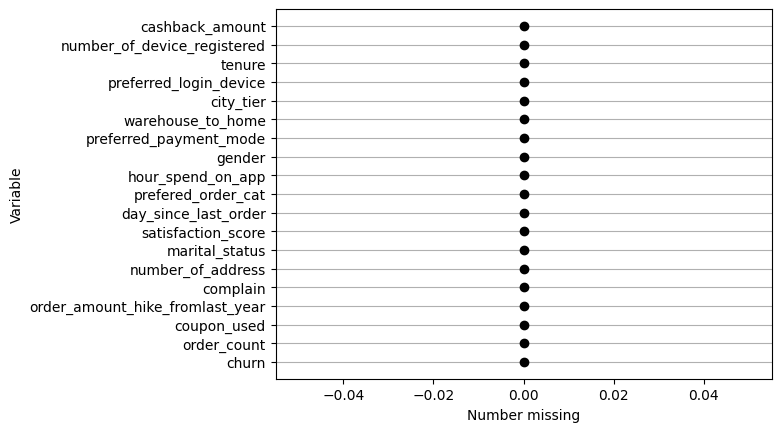

In [63]:

data_df_clean = data_df_clean_median
data_df_clean.missing.missing_variable_plot()

In [64]:
data_df_clean

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


# PASO 6 - CODIFICACIÓN DE VARIABLES CATEGORICAS

In [ ]:
categorical_columns = data_df_clean.select_dtypes(object).columns
categorical_columns

Index(['preferred_login_device', 'preferred_payment_mode', 'gender',
       'prefered_order_cat', 'marital_status'],
      dtype='object')

In [ ]:
for cc in categorical_columns:
  print("*"*50)
  print(data_df_clean[cc].value_counts())

**************************************************
preferred_login_device
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
**************************************************
preferred_payment_mode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
**************************************************
gender
Male      3384
Female    2246
Name: count, dtype: int64
**************************************************
prefered_order_cat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
**************************************************
marital_status
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [ ]:
ordinal_cols = ['gender']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
onehot_cols


['preferred_payment_mode',
 'prefered_order_cat',
 'preferred_login_device',
 'marital_status']

# CREAMO SUN TRANSFORMER

In [ ]:
import sklearn.compose
import sklearn.preprocessing

In [ ]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(),onehot_cols),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['gender']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['preferred_payment_mode',
                                  'prefered_order_cat',
                                  'preferred_login_device',
                                  'marital_status'])])

# APLICAMOS EL TRANSFOMER A LA VARIABLES CATEGORICAS

In [ ]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(data_df_clean),
        columns = transformer.get_feature_names_out(),
        index=data_df_clean.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,gender,preferred_payment_mode_CC,preferred_payment_mode_COD,preferred_payment_mode_Cash on Delivery,preferred_payment_mode_Credit Card,preferred_payment_mode_Debit Card,preferred_payment_mode_E wallet,preferred_payment_mode_UPI,prefered_order_cat_Fashion,prefered_order_cat_Grocery,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [ ]:
data_transformed_df = (
    data_transformed_df.clean_names(
        case_type="snake"
    )
)
data_transformed_df.columns

Index(['gender', 'preferred_payment_mode_cc', 'preferred_payment_mode_cod',
       'preferred_payment_mode_cash_on_delivery',
       'preferred_payment_mode_credit_card',
       'preferred_payment_mode_debit_card', 'preferred_payment_mode_e_wallet',
       'preferred_payment_mode_upi', 'prefered_order_cat_fashion',
       'prefered_order_cat_grocery', 'prefered_order_cat_laptop_&_accessory',
       'prefered_order_cat_mobile', 'prefered_order_cat_mobile_phone',
       'prefered_order_cat_others', 'preferred_login_device_computer',
       'preferred_login_device_mobile_phone', 'preferred_login_device_phone',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'churn', 'tenure', 'city_tier',
       'warehouse_to_home', 'hour_spend_on_app', 'number_of_device_registered',
       'satisfaction_score', 'number_of_address', 'complain',
       'order_amount_hike_fromlast_year', 'coupon_used', 'order_count',
       'day_since_last_order', 'cashback_amount

In [ ]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("prefered_order_cat_", "order_").replace("preferred_payment_mode_", "payment_").replace("preferred_login_device_", "login_").replace("marital_status_", "")
)
data_transformed_df


,gender,payment_cc,payment_cod,payment_cash_on_delivery,payment_credit_card,payment_debit_card,payment_e_wallet,payment_upi,order_fashion,order_grocery,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [ ]:
data_transformed_df = data_transformed_df.rename(
    columns={
        "order_laptop_&_accessory":"order_laptop",
        "order_mobile":"order_phone",
        "payment_cash_on_delivery":"payment_cash",
        "payment_credit_card":"payment_credit",
        "payment_debit_card":"payment_debit",
        "payment_e_wallet":"payment_ewallet",
        "login_mobile_phone":"login_mobile",
        "warehouse_to_home":"distance",
        "hour_spend_on_app":"hour_spend",
        "number_of_device_registered":"device_registered",
        "number_of_address":"number_address",
        "order_amount_hike_fromlast_year":"order_lastyear",
        "day_since_last_order":"days_lastorder"
    }
)
data_transformed_df.columns

Index(['gender', 'payment_cc', 'payment_cod', 'payment_cash', 'payment_credit',
       'payment_debit', 'payment_ewallet', 'payment_upi', 'order_fashion',
       'order_grocery', 'order_laptop', 'order_phone', 'order_mobile_phone',
       'order_others', 'login_computer', 'login_mobile', 'login_phone',
       'divorced', 'married', 'single', 'churn', 'tenure', 'city_tier',
       'distance', 'hour_spend', 'device_registered', 'satisfaction_score',
       'number_address', 'complain', 'order_lastyear', 'coupon_used',
       'order_count', 'days_lastorder', 'cashback_amount'],
      dtype='object')

In [ ]:
data_transformed_df

,gender,payment_cc,payment_cod,payment_cash,payment_credit,payment_debit,payment_ewallet,payment_upi,order_fashion,order_grocery,...,hour_spend,device_registered,satisfaction_score,number_address,complain,order_lastyear,coupon_used,order_count,days_lastorder,cashback_amount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


# MATRIZ DE CORRELACION

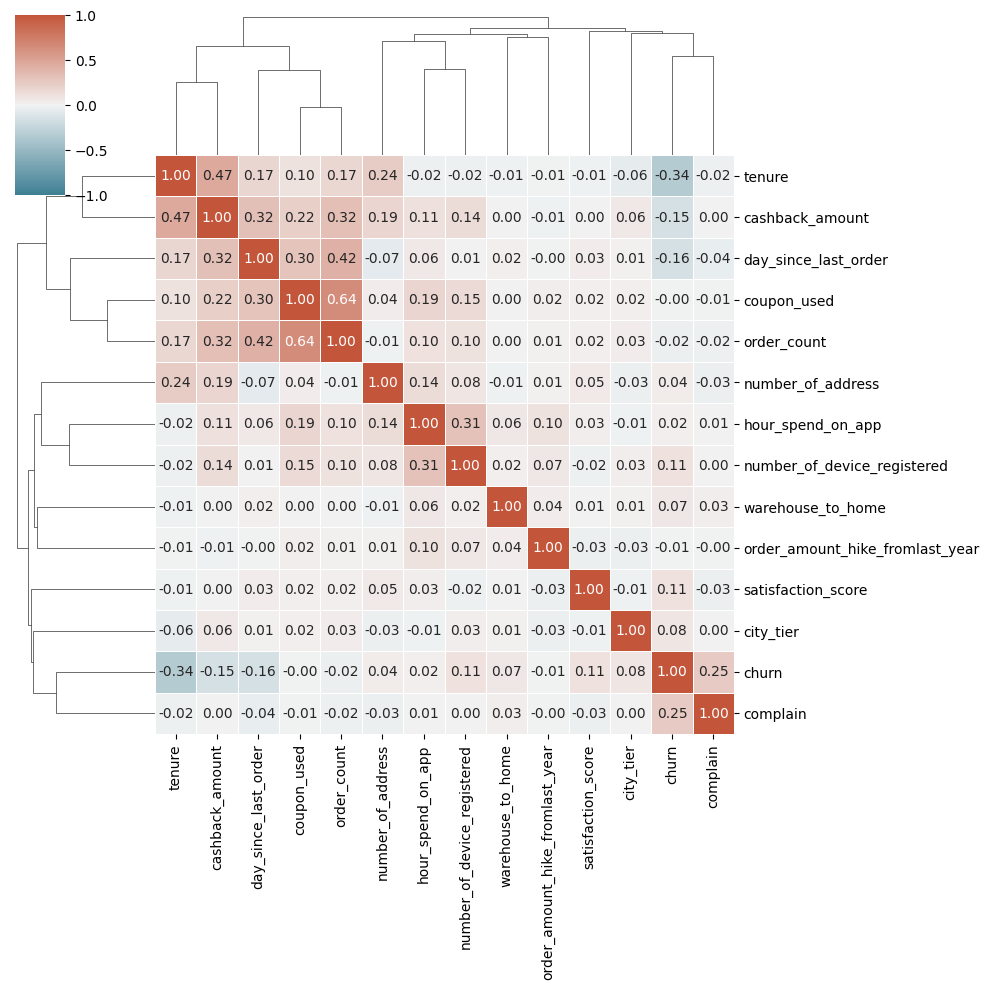

In [ ]:
sns.clustermap(
    data=data_df_clean.corr(numeric_only=True),
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    annot=True,
    fmt=".2f"
)


# REGRESION LOGISTICA

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model_1 = smf.logit(
    formula="churn ~ cashback_amount + tenure",
    data=data_transformed_df
).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.376766
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5627
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                  0.1689
Time:                        18:17:52   Log-Likelihood:                -2121.2
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                6.838e-188
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2707      0.183     -1.480      0.139      -0.629       0.088
cashback_amount    -0.0005      0.001     -0.409      0.683      -0.003       0.002
tenure             -0.1819      0.008    -21.755      0.000      -0.198      -0.166
===================================================================================
"""

In [ ]:
model_2 = smf.logit(
    formula="churn ~ tenure + order_count",
    data=data_transformed_df
).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.375444
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5627
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                  0.1718
Time:                        18:17:53   Log-Likelihood:                -2113.7
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                3.988e-191
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4792      0.063     -7.572      0.000      -0.603      -0.355
tenure         -0.1886    

In [ ]:
model_3 = smf.logit(
    formula="churn ~ satisfaction_score + complain",
    data=data_transformed_df
).fit()
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 0.417735
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5627
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                 0.07849
Time:                        18:17:26   Log-Likelihood:                -2351.8
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                 1.016e-87
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.8756      0.107    -26.805      0.000      -3.086      -2.665
satis

In [ ]:
model_4 = smf.logit(
    formula="churn ~ cashback_amount + order_count + satisfaction_score",
    data=data_transformed_df
).fit()
print(model_4.summary())

Optimization terminated successfully.
         Current function value: 0.433421
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5626
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                 0.04388
Time:                        18:17:30   Log-Likelihood:                -2440.2
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                 2.752e-48
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4647      0.179     -2.589      0.010      -0.817      -0.113
cashb

In [ ]:
model_5 = smf.logit(
    formula="churn ~ cashback_amount + tenure + order_count + satisfaction_score + complain",
    data=data_transformed_df
).fit()
print(model_5.summary())

Optimization terminated successfully.
         Current function value: 0.339863
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5624
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                  0.2503
Time:                        18:17:32   Log-Likelihood:                -1913.4
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                4.875e-274
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5184      0.219     -6.929      0.000      -1.948      -1.089
cashb

In [ ]:
model_1_predict = model_1.predict(data_transformed_df)
model_2_predict = model_2.predict(data_transformed_df)
model_3_predict = model_3.predict(data_transformed_df)
model_4_predict = model_4.predict(data_transformed_df)
model_5_predict = model_5.predict(data_transformed_df)

In [ ]:
dic_predict = {
    'actual_value': data_transformed_df.churn,
    'model_1_predict': model_1_predict,
    'model_2_predict': model_2_predict,
    'model_3_predict': model_3_predict,
    'model_4_predict': model_4_predict,
    'model_5_predict': model_5_predict,
}

models_result = pd.DataFrame(dic_predict)
models_result


,actual_value,model_1_predict,model_2_predict,model_3_predict,model_4_predict,model_5_predict
0,1.0,0.254717,0.236282,0.263527,0.141124,0.371814
1,1.0,0.122958,0.107551,0.312281,0.240249,0.249367
2,1.0,0.123009,0.107551,0.312281,0.242312,0.249814
3,1.0,0.417319,0.396777,0.156507,0.295821,0.386674
4,1.0,0.417778,0.396777,0.156507,0.305295,0.388938
...,...,...,...,...,...,...
5625,0.0,0.103332,0.095842,0.066770,0.131375,0.034294
5626,0.0,0.060581,0.056786,0.156507,0.134517,0.046132
5627,0.0,0.368147,0.366512,0.365577,0.162814,0.637811
5628,0.0,0.010576,0.009052,0.127562,0.173852,0.006409


In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

<Axes: ylabel='Proportion'>

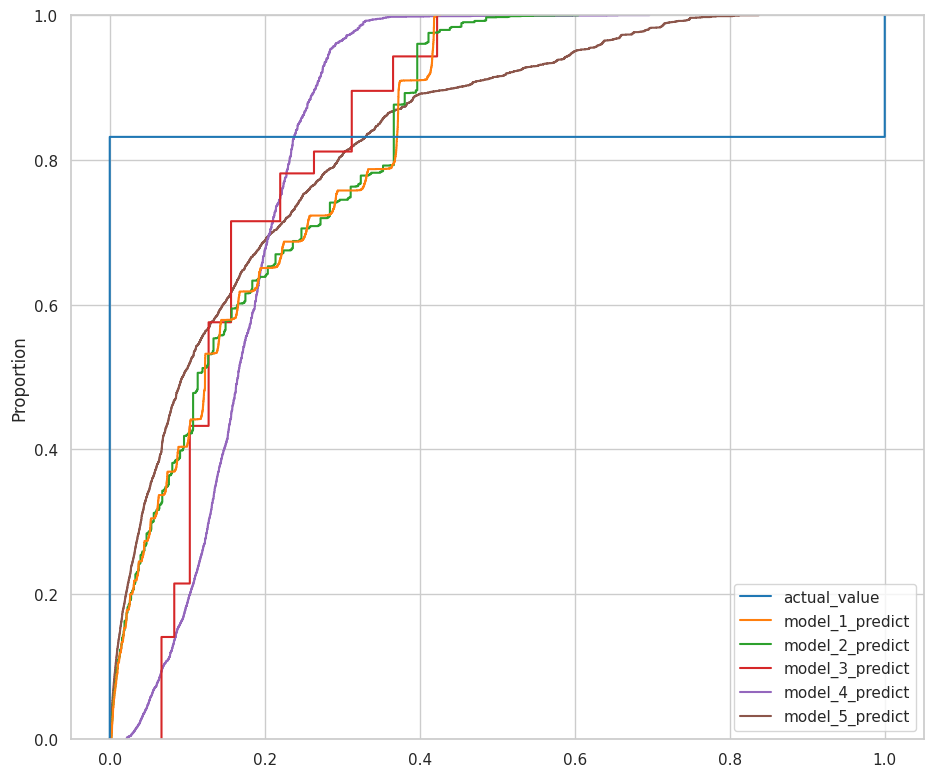

In [ ]:
sns.ecdfplot(
    data=models_result
)

<Axes: ylabel='Proportion'>

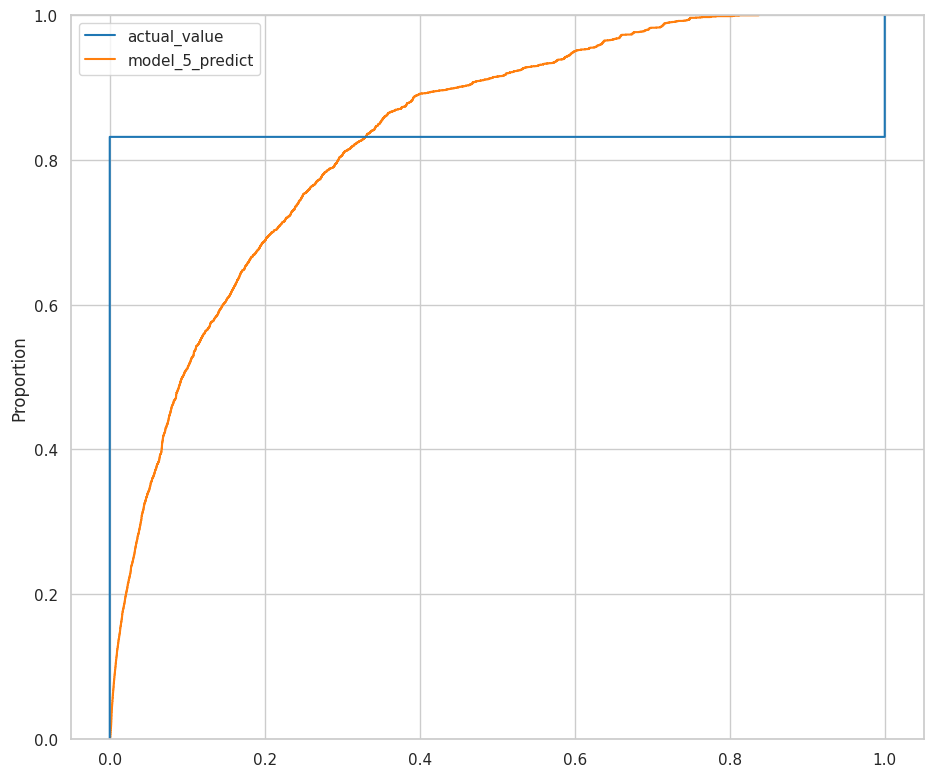

In [ ]:
sns.ecdfplot(data=models_result[['actual_value','model_5_predict']])

In [ ]:
churn_predictions = pd.DataFrame(
    dict(
        actual_value = data_transformed_df.churn,
        predicted_value = model_5.predict()
    )
)
churn_predictions


,actual_value,predicted_value
0,1.0,0.371814
1,1.0,0.249367
2,1.0,0.249814
3,1.0,0.386674
4,1.0,0.388938
...,...,...
5625,0.0,0.034294
5626,0.0,0.046132
5627,0.0,0.637811
5628,0.0,0.006409


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
churn_predictions = pd.DataFrame(
    dict(
        actual_value = data_transformed_df.churn,
        predicted_value = (model_5.predict() >= 0.5).astype(int)
    )
)

In [ ]:
conf_matrix = confusion_matrix(churn_predictions.actual_value, churn_predictions.predicted_value)
conf_matrix

array([[4522,  160],
       [ 629,  319]])

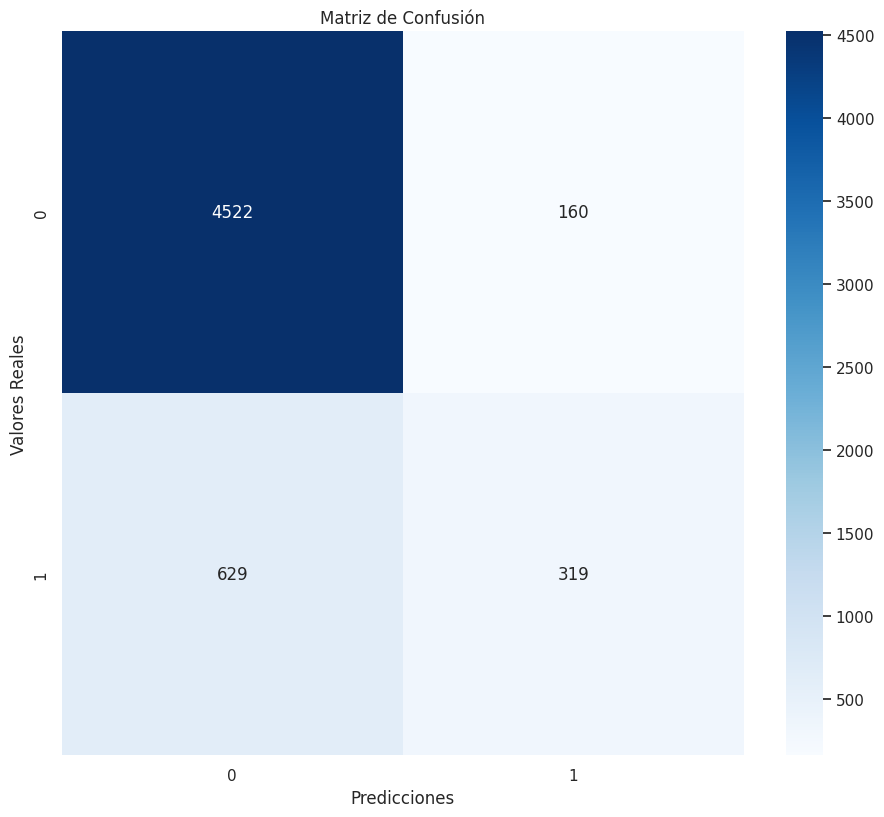

Pseudo R2 : 0.2503


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5627
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                  0.1718
Time:                        18:30:36   Log-Likelihood:                -2113.7
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                3.988e-191
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4792      0.063     -7.572      0.000      -0.603      -0.355
tenure         -0.1886      0.008    -23.093      0.000      -0.205      -0.173
order_count     0.0603      0.015      3.972      0.000       0.031       0.090
===============================================================================
"""

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print(f'Pseudo R2 : {model_5.prsquared:.4f}')
model_2.summary()